In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("../news_paragraphs.json")
dti = pd.to_datetime(df[["year", "month", "day", "hour"]], errors="coerce")
df["time"] = dti
original_df = df.copy()

print(df.iloc[3])

paragraph    <<<\nמזג האוויר: מחר הטמפרטורות תישארנה רגילות...
hour                                                        21
day                                                         29
month                                                        8
year                                                      2019
filename     C:\Users\sapir\Documents\חדשות לעריכה\2019\20-...
time                                       2019-08-29 21:00:00
Name: 3, dtype: object


## Text Cleaning

## Remove Weather and Traffic Reports 

Many of the most common words are related to traffic reports (which are given every morning) and weather reports (which are given every report).
They tend to appear at the end of the paragraph, so we'll remove these from the passages.

In [2]:
import re
WEATHER_REGEX = "(תחזית\s)*מזג\s*(-|\s+)\s*האוויר\s*(:|-|,|;)(.|\n)*"
WEATHER_REGEX2 = "תחזית מזג\s*(-|\s+)\s*האוויר(.|\n)*"
WEATHER_REGEX3 = "(תחזית\s)*מזג\s*(-|\s+)\s*האוויר ל(.|\n)*"
WEATHER_REGEX4 = "(תחזית\s)*מזג\s*(-|\s+)\s*האוויר מחר(.|\n)*"
WEATHER_REGEX5 = "ו*התחזית"
WEATHER_REGEX6 = "(תחזית\s)*מזג\s*(-|\s+)\s*האוויר הלילה(.|\n)*"
WEATHER_REGEX7 = "(תחזית\s)*מזג\s*(-|\s+)\s*האוויר הערב(.|\n)*"
TRAFFIC_REGEX = "עדכוני תנועה(.|\n)*"
def remove_weather_and_traffic(s):
    s = re.sub(WEATHER_REGEX, " ", s)
    s = re.sub(WEATHER_REGEX2, " ", s)
    s = re.sub(WEATHER_REGEX3, " ", s)
    s = re.sub(WEATHER_REGEX4, " ", s)
    s = re.sub(WEATHER_REGEX5, " ", s)
    s = re.sub(WEATHER_REGEX6, " ", s)
    s = re.sub(WEATHER_REGEX7, " ", s)
    s = re.sub(TRAFFIC_REGEX, " ", s)
    return s

df.loc[:,"paragraph"] = df.paragraph.apply(lambda x: remove_weather_and_traffic(x))

df

,paragraph,hour,day,month,year,filename,time
0,"המתיחות בגבול הצפוני: מפקד פיקוד הצפון, האלוף ...",21,29,8,2019,C:\Users\sapir\Documents\חדשות לעריכה\2019\20-...,2019-08-29 21:00:00
1,<<<\nשלושה ימים לפתיחת שנת הלימודים: אלפי מורי...,21,29,8,2019,C:\Users\sapir\Documents\חדשות לעריכה\2019\20-...,2019-08-29 21:00:00
2,<<<\nרוכב אופנוע נהרג הערב בתאונת דרכים בסמוך ...,21,29,8,2019,C:\Users\sapir\Documents\חדשות לעריכה\2019\20-...,2019-08-29 21:00:00
3,<<<\n,21,29,8,2019,C:\Users\sapir\Documents\חדשות לעריכה\2019\20-...,2019-08-29 21:00:00
4,ראש הממשלה בנימין נתניהו מתייחס הערב לתכנית הש...,21,20,8,2019,C:\Users\sapir\Documents\חדשות לעריכה\2019\20-...,2019-08-20 21:00:00
...,...,...,...,...,...,...,...
5133,<<<\nרצח שלישי בטירה תוך שלושה חודשים: מוחמד ק...,8,14,3,2021,C:\Users\sapir\Documents\חדשות לעריכה\2021\6-8...,2021-03-14 08:00:00
5134,<<<\nתשעה ימים לבחירות אלפיים עשרים ואחת: יושב...,8,14,3,2021,C:\Users\sapir\Documents\חדשות לעריכה\2021\6-8...,2021-03-14 08:00:00
5135,<<<\nצרות לאסטרה-זנקיה:דיווחים בעולם על היווצר...,8,14,3,2021,C:\Users\sapir\Documents\חדשות לעריכה\2021\6-8...,2021-03-14 08:00:00
5136,<<<\nבצד השני של הגדר: כתבנו לענייני צבא וביטח...,8,14,3,2021,C:\Users\sapir\Documents\חדשות לעריכה\2021\6-8...,2021-03-14 08:00:00


#### Remove Punctuation

In [3]:
import re
import string

def clean_notes_and_inserts(s):
    notes = ["(--", "--)", "----" "<<<", ">>>", "<<<"]
    lines = re.split("\n+", s)
    good_lines = []
    for line in lines:
        if not any(note in line for note in notes):
            good_lines.append(line)
    return "\n".join(good_lines)

def clean_punctuation(s):
    s = re.sub("[\.:]+", "\n", s)
    s = re.sub("[-᠆‑₋—−–]+", " ", s)
    s = s.translate(str.maketrans('', '', string.punctuation))
    return s

df.loc[:,"paragraph"] = df.paragraph.apply(lambda x: clean_notes_and_inserts(x))

# punctuation stripping
df.loc[:,"paragraph"] = df.paragraph.apply(lambda x: clean_punctuation(x))


#### Remove start and end templates

In [4]:
TEMPLATE_REGEX_START = 'גלי\s*(\s+|-)\s*(צהל|צה"ל),*\s+השעה\s+.*\n'
TEMPLATE_REGEX_END = 'אלה החדשות (שעורכים|שעורך|שערך|שעורכת|שערכו).*'
TEMPLATE_REGEX_END2 = 'אלה החדשות.*'

def clean_template(s):
    s = re.sub(TEMPLATE_REGEX_START, " ", s)
    s = re.sub(TEMPLATE_REGEX_END, " ", s)
    s = re.sub(TEMPLATE_REGEX_END2, " ", s)
    return s

df.loc[:,"paragraph"] = df.paragraph.apply(lambda x: clean_template(x))

#### Remove too short passages

In [5]:
too_short_bool = df["paragraph"].str.split().apply(len) > 5
df = df[too_short_bool]

#### Remove "כתבנו/כתבתנו מוסר":

In [6]:
OUR_REPORTER_REGEX = 'כתב(י|ת)*נו.* (מוסרת*|מספרת*)*'
def remove_our_reporter(s):
    s = re.sub(OUR_REPORTER_REGEX, " ", s)
    return s

df.loc[:,"paragraph"] = df.paragraph.apply(lambda x: remove_our_reporter(x))

C:\Users\sapir\miniconda3\envs\hebNLP_project\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## Data Statistics

### Statistics of number of paragraphs per news report

In [7]:
# Number of paragraphs per news report
frequencies_df = df["time"].value_counts()
print(frequencies_df)

# drop files with 1 detected paragraph - error
# Average number of paragraph per news report
df["time"].value_counts().mean()

2020-03-18 08:00:00    9
2020-03-25 08:00:00    9
2019-06-20 08:00:00    9
2019-12-18 08:00:00    9
2020-04-01 08:00:00    9
                      ..
2019-10-30 08:00:00    1
2019-02-06 08:00:00    1
2019-07-21 08:00:00    1
2019-10-10 08:00:00    1
2019-06-30 08:00:00    1
Name: time, Length: 877, dtype: int64


5.309007981755986

### One Sample

In [38]:
aa=df.iloc[1,0]
print(aa)

שלושה ימים לפתיחת שנת הלימודים
 אלפי מורים סיימו בשעה זו להפגין ברחבת מוזיאון תל אביב כחלק ממחאת הסתדרות המורים על תנאי העסקתם
 ההפגנה נערכת על רקע המגעים בין ההסתדרות למשרד האוצר על פתיחת שנת הלימודים בבתי הספר היסודיים כסדרה ומטרתה היא להשפיע על משרדי הממשלה להיענות לדרישותיהם של עובדי ההוראה

מזכלית הסתדרות המורים יפה בן דוד אמרה בהפגנה כי היום אני עומדת כאן כדי לאותת למדינת ישראל
 עובדי הוראה יפסיקו לשתוק ודורשים את הזכויות שמגיעות להם על פי החוק״

  השביתה



C:\Users\sapir\miniconda3\envs\hebNLP_project\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Stopwords analysis

In [9]:
def get_hebrew_stopwords(top_k):
    stop_path="../added_material/heb_stopwords.txt"
    with open(stop_path, encoding="utf-8") as in_file:
        lines=in_file.readlines()
        res=[l.strip() for l in lines]
        print(res[:top_k])
    return res

stop = set(get_hebrew_stopwords(10))
paragraph_text = df["paragraph"]

['את', 'לא', 'של', 'אני', 'על', 'זה', 'עם', 'כל', 'הוא', 'אם']


##### Custom stop words:

In [10]:
CUSTOM_STOPWORDS = ["בעקבות", "נמסר", "כתבתנו", "כתבנו", "הבוקר", "הלילה", "אמש"]
stop.update(CUSTOM_STOPWORDS)

##### Character Length Histogram

In [11]:
def plot_character_length_histogram(text):
    text.str.len().\
        hist()

Character Length Histogram


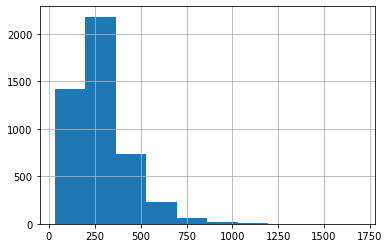

In [12]:
print("Character Length Histogram")
plot_character_length_histogram(paragraph_text)

###### Word Number Histogram

In [13]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
    
def average_word_number(text):
    return text.str.split().apply(len).\
        mean()

mean:49.38122852233677


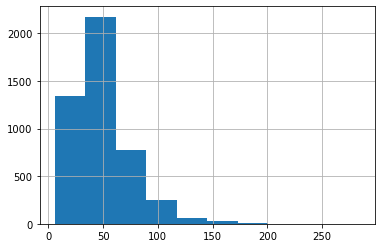

In [14]:
plot_word_number_histogram(paragraph_text)
print("mean:" + str(average_word_number(paragraph_text)))

##### Top Stopwords Barchart

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top_stopwords_barchart(text, stop):
    #stop=set(stopwords.words('english'))
    #stop=set(get_hebrew_stopwords())
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    x=[w[::-1] for w in x]
    plt.bar(x,y)

In [16]:
def invert_words(words):
    return [w[::-1] for w in words]

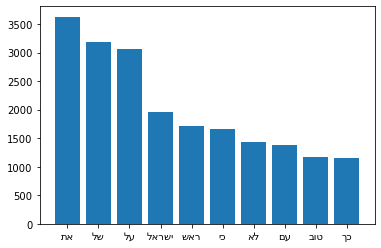

In [17]:
plot_top_stopwords_barchart(paragraph_text, stop)

#### Top Non-Stopwords Barchart

In [18]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text, stop):
    #stop=set(get_hebrew_stopwords())
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:60]:
        if (word not in stop):
            x.append(word)
            y.append(count)            
    sns.barplot(x=y,y=invert_words(x))

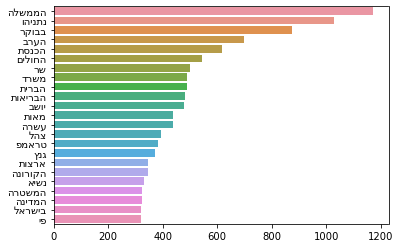

In [19]:
plot_top_non_stopwords_barchart(paragraph_text, stop)

###### Stopwords in Evening Only:

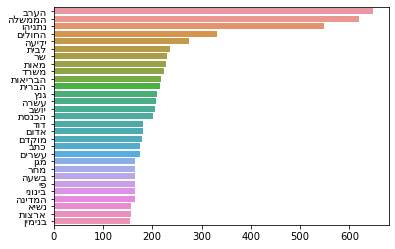

In [20]:
evening_df = df.loc[df['hour'] == 21]
evening_text = evening_df["paragraph"]
plot_top_non_stopwords_barchart(evening_text, stop)

###### Stopwords in Morning Only:

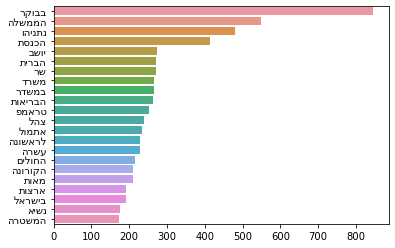

In [21]:
morning_df = df.loc[df['hour'] == 8]
morning_text = morning_df["paragraph"]
plot_top_non_stopwords_barchart(morning_text, stop)

# Top N-grams Barchart


In [22]:
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    #stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:30]

    top_n_bigrams=_get_top_ngram(text,n)[:30]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=invert_words(x))

### Bigrams

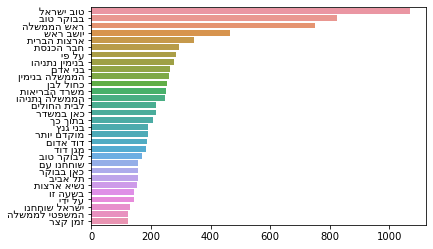

In [23]:
plot_top_ngrams_barchart(paragraph_text,2)

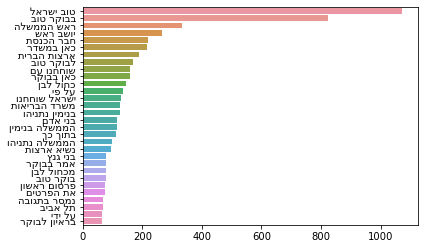

In [24]:
plot_top_ngrams_barchart(morning_text,2)

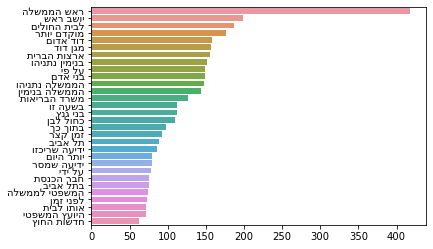

In [25]:
plot_top_ngrams_barchart(evening_text,2)

### Trigrams

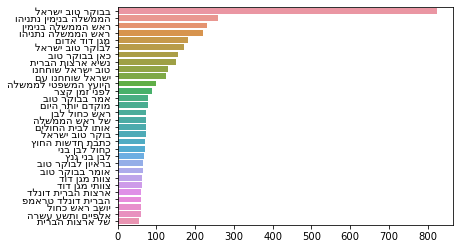

In [26]:
plot_top_ngrams_barchart(paragraph_text,3)

# LDA topics

In [27]:
import numpy as np
import nltk
nltk.download('punkt')
#from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models


def get_lda_objects(text, stop):
    #nltk.download('stopwords')    
    #top=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 6, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    return vis

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sapir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\sapir\miniconda3\envs\hebNLP_project\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [28]:
lda_model, bow_corpus, dic = get_lda_objects(paragraph_text, stop)
lda_model.show_topics()

C:\Users\sapir\miniconda3\envs\hebNLP_project\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.006*"בבוקר" + 0.006*"הממשלה" + 0.005*"הבריאות" + 0.005*"החינוך" + 0.004*"הערב" + 0.004*"משרד" + 0.004*"הפועל" + 0.003*"הסגר" + 0.002*"עשר" + 0.002*"חדשות"'),
 (1,
  '0.005*"המשטרה" + 0.005*"החולים" + 0.004*"עשרה" + 0.004*"לבית" + 0.003*"עשרים" + 0.003*"גבר" + 0.003*"ידיעה" + 0.003*"החשוד" + 0.003*"בשנות" + 0.003*"טראמפ"'),
 (2,
  '0.007*"מאות" + 0.007*"הממשלה" + 0.007*"הבריאות" + 0.006*"בבוקר" + 0.005*"נתניהו" + 0.004*"החולים" + 0.004*"הכנסת" + 0.003*"משרד" + 0.003*"במצב" + 0.003*"אחוזים"'),
 (3,
  '0.007*"הבריאות" + 0.006*"משרד" + 0.006*"הממשלה" + 0.005*"בבוקר" + 0.004*"נתניהו" + 0.004*"מאות" + 0.003*"החינוך" + 0.003*"כתב" + 0.003*"אלף" + 0.003*"החולים"'),
 (4,
  '0.008*"נתניהו" + 0.007*"הברית" + 0.007*"הממשלה" + 0.006*"ארצות" + 0.005*"טראמפ" + 0.005*"נשיא" + 0.004*"בבוקר" + 0.004*"החוץ" + 0.004*"הכנסת" + 0.003*"המדינה"'),
 (5,
  '0.007*"בבוקר" + 0.005*"הקורונה" + 0.005*"הממשלה" + 0.004*"הכנסת" + 0.003*"הבריאות" + 0.003*"החולים" + 0.003*"הברית" + 0.003*"בישראל" + 0.003*"הערב

In [29]:
plot_lda_vis(lda_model, bow_corpus, dic)

C:\Users\sapir\miniconda3\envs\hebNLP_project\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.073062 -0.186058       1        1  24.614353
2      0.042972  0.029633       2        1  19.216298
1     -0.190775  0.109532       3        1  18.706713
5      0.037473 -0.027512       4        1  15.717170
0      0.104027  0.046817       5        1  12.842161
3      0.079365  0.027588       6        1   8.903305, topic_info=          Term        Freq       Total Category  logprob  loglift
572    הבריאות  567.000000  567.000000  Default  30.0000  30.0000
830       מאות  410.000000  410.000000  Default  29.0000  29.0000
476       משרד  430.000000  430.000000  Default  28.0000  28.0000
89      הממשלה  908.000000  908.000000  Default  27.0000  27.0000
750      הברית  492.000000  492.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
189      ידיעה   26.762050  254.133711   Topic6  -6.3623   0.1679
23837   אובחנו   22.911687  123.212094   Topic6  -6.5177   0.7365
277      אלפים   23.967510  169.203326   Topic6  -6.4726   0.4643
133       הערב   27.207630  472.765963   Topic6  -6.3458  -0.4364
638      עשרים   25.249215  313.609606   Topic6  -6.4205  -0.1006

[487 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
23635      6  0.814761   אבטלה
124        1  0.040544    אדום
124        2  0.466255    אדום
124        3  0.479770    אדום
124        4  0.006757    אדום
...      ...       ...     ...
1116       3  0.863803    תושב
1116       4  0.080982    תושב
965        1  0.039499  תקשורת
965        2  0.197493  תקשורת
965        4  0.750472  תקשורת

[1008 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 6, 1, 4])